(513, 6)


(1, 513, 6)

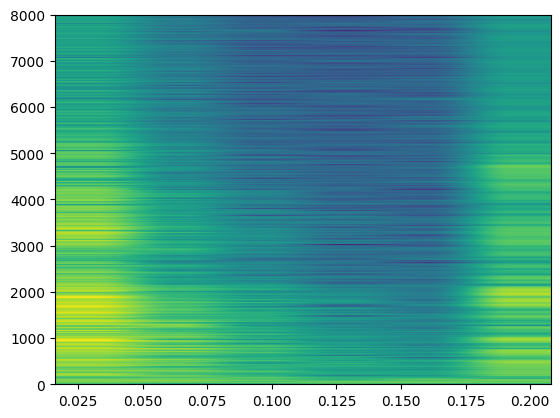

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


### Configuration 

folder = 'data_set/'
file_name = 'now.txt'
fs = 16000
model_name = 'command_model.tflite'

data = np.loadtxt(folder+file_name)

# Definir los parámetros para el espectrograma
win = np.hamming(1024)
nfft = 1024
hop = nfft // 2

# Constants from the data set adquisition
time_per_sample = 2.5
samples_per_record = int (1600*time_per_sample)

start=50
end = start + samples_per_record

# Calcular el espectrograma
# spec, freqs, times, _ = plt.specgram(data, NFFT=nfft, Fs=fs, window=win, noverlap=hop)
spec, freqs, times, _ = plt.specgram(data[start:end-1], NFFT=nfft, Fs=fs, window=win, noverlap=hop)
print(spec.shape)
spec = np.expand_dims(spec, axis=0)
spec.shape

In [2]:
import tensorflow as tf

# Cargar el modelo desde el archivo .tflite
interpreter = tf.lite.Interpreter(model_path=model_name)

# Asignar tensores a la entrada y salida del modelo
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Asignar los datos de entrada al tensor de entrada del modelo
input_data = np.expand_dims(spec.astype('float32'), axis=0)
interpreter.allocate_tensors()

interpreter.set_tensor(input_details[0]['index'], input_data)

# Ejecutar el modelo
interpreter.invoke()

# Obtener los resultados del modelo
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)



[[9.999821e-01 1.784141e-05]]
